In [1]:
from CustomModel import CustomCnn

custom_cnn = CustomCnn(generator=False, model_name="test")

In [2]:
custom_cnn._load_model(directory="./test/", model_name="mnist_test1")

In [3]:
from keras.datasets import mnist
import keras

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype("float32") / 255.
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype("float32") / 255.

y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [4]:
pred = custom_cnn._predict(x_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [20]:
import numpy as np
from sklearn.metrics import accuracy_score
label = np.argmax(y_test, axis=1)

print(accuracy_score(pred, label))

0.9902


In [21]:
dog_cat_cnn = CustomCnn(generator=True, model_name="test")
dog_cat_cnn._load_model(directory="./test/", model_name="dog_cat_test2")

In [22]:
dog_cat_cnn._info()

{'generator': True,
 'image_shape': [64, 64],
 'batch_size': 20,
 'model_name': 'dog_cat_test2',
 'class_indices': {'cats': 0, 'dogs': 1}}

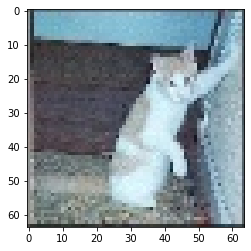

In [6]:
from keras.preprocessing import image
import matplotlib.pyplot as plt

img = image.load_img("./dog_cat_dataset/test_set/cats/cat0.jpg")
plt.imshow(img)

In [7]:
img = image.img_to_array(img)
print(img)
print(img.shape)

[[[112. 114. 111.]
  [ 54.  65.  67.]
  [ 87. 114. 131.]
  ...
  [ 77. 107. 115.]
  [114. 134. 141.]
  [ 69.  86.  93.]]

 [[144. 148. 147.]
  [ 42.  55.  61.]
  [138. 171. 188.]
  ...
  [174. 206. 217.]
  [186. 208. 219.]
  [ 71.  89.  99.]]

 [[137. 147. 149.]
  [ 33.  53.  60.]
  [121. 162. 180.]
  ...
  [159. 196. 214.]
  [145. 173. 187.]
  [ 72.  94. 108.]]

 ...

 [[145. 146. 141.]
  [161. 163. 158.]
  [132. 138. 134.]
  ...
  [174. 191. 201.]
  [187. 197. 206.]
  [ 89.  98. 103.]]

 [[144. 143. 139.]
  [153. 154. 149.]
  [147. 152. 148.]
  ...
  [176. 190. 199.]
  [182. 193. 199.]
  [ 89.  99. 101.]]

 [[ 72.  71.  67.]
  [ 47.  48.  43.]
  [ 43.  48.  44.]
  ...
  [ 56.  70.  79.]
  [ 60.  71.  75.]
  [ 37.  47.  49.]]]
(64, 64, 3)


In [8]:
import numpy as np

img = np.expand_dims(img, axis=0)
img.shape

(1, 64, 64, 3)

In [23]:
pred = dog_cat_cnn._predict(img)

In [24]:
print(pred)

cats


In [25]:
from ModelsSet import CnnSet

cnn_set = CnnSet(cnn_set_name = "cnn_set1")

In [26]:
cnn_set._add_model(custom_cnn)
cnn_set._add_model(dog_cat_cnn)

In [28]:
cnn_set_pred = cnn_set._get("dog_cat_test2")._predict(img)
print(pred)

cats


In [16]:
cnn_set._save_cnn_set("./")

In [1]:
from ModelsSet import CnnSet

cnn_set = CnnSet(cnn_set_name = "test")

In [2]:
cnn_set._load_cnn_set(cnn_set_path = "./cnn_set1")

In [3]:
cnn_set._info()

{'cnn_set': ['dog_cat_test2', 'mnist_test1'],
 'cnn_set_name': 'cnn_set1',
 'path': './cnn_set1'}

In [9]:
pred = cnn_set._get("dog_cat_test2")._predict(img)
pred

'cats'

In [10]:
cnn_set._delete_model("mnist_test1")

In [11]:
cnn_set._info()

{'cnn_set': ['dog_cat_test2'],
 'cnn_set_name': 'cnn_set1',
 'path': './cnn_set1'}

In [13]:
cnn_set._delete_cnn_set()

OSError: [WinError 145] 디렉터리가 비어 있지 않습니다: './cnn_set1'